# Social Influencer Selection by Budgeted Portfolio Optimization

25 April 2021

We evaluate here the performance of our algorithms for different campaign objectives using information from a real large Twitter data trace. This database represents the activity and characteristics of users on twitter associated with the 2018 Russian elections.

## The Budgeted Portfolio Optimization Problem

In the budgeted portfolio optimization problem an advertiser $i \in \mathcal{N}$ with a certain monetary budget $B$ [EUR/time window] in his (her) disposal orchestrates an advertising campaign in a unit of time (equal to the time window) by investing on other users to create posts in his (her) favour. The aim is to maximize some impact metric, e.g. the number of impressions, the sales, or the audience reach.

We suppose that for each user $n\ne i$ there is an associated cost per post $c_n$ [EUR/post] so that the user $n$ will be willing to create posts in favor of the advertiser $i$.

In order to formulate this optimisation problem, we need to quantify the participation of each user $n$ in the campaign of the advertiser $i$. Hence, we define for each user $n \in \mathcal{N}\setminus \{i \} $, the continuous participation ratio $a_n \in [0,1]$ in the campaign as the unknown proportion of user $n$'s generated posts acquired by the advertiser $i$ in the unit of time, we fix $a_i=1$ meaning that the advertiser always posts to promote its own product.

Similarly, we define by $p^{(j)}_n(a_n)$ the campaign-related impression ratio as the average value of the impression ratio in the Newsfeed of user $j$ originating from user $n$ and related to the campaign of the advertiser $i$. The campaign-related impression ratio can be similarly estimated and measured as above and satisfies:
\begin{equation}
p^{(j)}_n(a_n) \leq p^{(j)}_n \ \ \forall n,j \in \mathcal{N}.
\end{equation}

The empirical probability that an impression reaching user $j$ is related to the campaign is called the $\textit{potential of user $j$}$ and equals:
\begin{equation}
\label{omega}
\omega^{(j)}(\mathbf{a})=\sum_{n \in \mathcal{N}\setminus \{j \} } p^{(j)}_n(a_n) \leq 1.
\end{equation}

In the above $\mathbf{a}=(a_1,...,a_N)^{T}$ is the participation vector of all the users into the advertising campaigns of user $i$.

We introduce a utility function $U_j$ for each user $j$ that maps the potential of user $j$, $\omega^{(j)}$, to the campaign objective of the advertiser $i$. Different expressions for $U_j$ model different performance metrics. 

The budget invested to user $n\not =i$ by the advertiser $i$ is $ B_n(a_n) = c_n a_n \lambda ^ {(n)}$ [EUR/time window] and the total budget of the advertiser $i$ is $B$ [EUR/time window]. Therefore the constraints in our budgeted portfolio optimization problem will be naturally a budget restriction $\sum_{n \not =i} B_n(a_n) \leq B$ and the continuous unknown variables $a_n \in [0,1]$. Finally, we can formulate the general budgeted portfolio optimization problem in OSPs whose purpose is to find the set of unknowns $\{a_n\}_{n\not = i}$ that maximize the sum of user utility functions (excluding the advertiser $i$), $\sum_{j \in \mathcal{N}\setminus \{i \} } U_j(\omega^{(j)}(\mathbf{a}))$ subject to the constraints presented:
\begin{align}
\begin{aligned}
  \textrm{max}_{\{a_n \}_{n\in \mathcal{N}\setminus \{i \} }} &\sum_{j \in \mathcal{N}\setminus \{i \} } U_j(\omega^{(j)}(\mathbf{a})), \\\\\\
  \textrm{ s.t.} & \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B, \\\\\\
  & a_i=r_i, \ 0 \leq a_n \leq r_n,  \forall n \in \mathcal{N}.
\end{aligned}
\end{align}

If $U_j$ are linear, then the problem can be solved by a greedy algorithm, but in general we need to appeal to iterative processes to approximate the desired advertising policy.

### Assumption on ad propagation and impact metrics

An assumption that we consider a linear propagation for the posts related to the campaign and seen on the Newsfeeds, namely:
\begin{equation}
    p^{(j)}_n(a_n)=a_n p^{(j)}_n.
\end{equation}

This is reasonable because if the user $j$ is an immediate follower of influencer $n$, and all posts from the influencer appear on his Newsfeed, then a percentage $a_n$ will be related to the campaign. This is actually the case for platforms without sharing, like Instagram, but for other platforms, impressions could arrive through sharing of content from intermediate users. Then, the above linear expression implies that a post of $j$ is shared randomly, independent of its content, which of course is not true. We will use however the linear assumption as a reasonable approximation to the campaign diffusion process for any platform, because we lack of any prior information related to how users might react to the campaign’s posts. So, each potential of the user $j$ is expressed as: 
\begin{equation}
    \omega^{(j)}(\mathbf{a})=\sum_{n \in \mathcal{N}\setminus \{j \} } a_n p^{(j)}_n.
\end{equation}


The utility function $U_j$ in [BPO] of the user $j$, represents:

- Impressions/Engagements: In this case, the objective function for each user is a linear function:
    \begin{equation}
    U_j(\omega^{(j)}(\mathbf{a}))=K_j \ (\omega^{(j)}(\mathbf{a})).\end{equation}
- Conversion/Sales: We will use the logarithmic function in particular to measure Sales.     \begin{equation}
    U_j(\omega^{(j)}(\mathbf{a}))=log(K_j \ (\omega^{(j)}(\mathbf{a}))+1).\end{equation}
- Reach: We model this case by applying user-specific thresholds $\epsilon_j$ for each user $j$. If the user $j$ sees more than the threshold $\epsilon_j$ campaign-related impression ratio $\omega^{(j)}(\mathbf{a})$, then the user $j$ is consider to be reached by the campaign:
    \begin{equation}
    U_j(\omega^{(j)}(\mathbf{a}))=I_{\omega^{(j)}(\mathbf{a})>\epsilon_j}.\end{equation}

In the above $K_j$ is a normalization constant that scales the potential of a user $j$ to the total number of impressions received related to the campaign.

Hence, under the assumption of a linear propagation model and activity constraints $\{r_n \}_{n \not=i}$ we have the formulation of the budgeted portfolio optimization problem in OSPs for various impact metrics:
\begin{align}
\begin{aligned}
  \textrm{max}_{\{a_n \}_{n \in \mathcal{N}\setminus \{i \} }} & \sum_{j \in \mathcal{N}\setminus \{i \} } U_j(\sum_{n \in \mathcal{N}\setminus \{j \} } [a_n p^{(j)}_n]), \\\\\\
  \textrm{ s.t.} & \sum_{n \in \mathcal{N}\setminus \{i \} }  c_n a_n \lambda ^ {(n)} \leq B, \\\\\\
  & a_i=r_i, \ 0 \leq a_n \leq r_n,  \forall n \in \mathcal{N}.
\end{aligned}
\end{align}

We will suppose for the rest of our analysis that users do not have restrictions on the sale of their posts, namely, $r_n=1$ for all the users in the network.

## Actual Input from Twitter Data Set

We have used the russian_rtid.txt database. This database represents the activity of users on Twitter during the 2018 Russian elections. In particular for our purposes, we use a 4-uple per post with the following information obtained from this database: 


$$[TweetID,\ TimeStamp,\ UserID,\ RetweetID]$$

The dataset is described as a list of such 4-uples. Each participating user and Tweet have a unique associated UserID and TweetID respectively. RetweetID represents the TweetID which was retweeted (or $-1$ if it is a self-post) and TimeStamp is the time that the Tweet was (re)-posted. The entire database spans $57$ days and involves $181,621$ different $UserID$s. 

From the dataset, we derive the empirical post and re-post rate for every user $\{ \lambda ^ {(n)} \}_{n \in \mathcal{N}}$ and $\{ \mu ^ {(n)} \}_{n \in \mathcal{N}}$ respectively. We can further infer a friendship graph using the relationships of retweets (RetweetID), by drawing a directed edge from leader to follower, each time a user retweets something. We call this a "star" graph due to its shape: it contains $181,621$ nodes. Among the users, $167,646$ users lack of followers and only $13,975$ users have followers. The latter can be potential influencers and we denote their set by $\mathcal{L}$.

### Implementation

In [1]:
%pylab inline
import math
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from numpy import inf

Populating the interactive namespace from numpy and matplotlib


In [2]:
directory = "/Users/Ricardo Lopez Dawn/Desktop/BPO/"
f = open(directory+"/russian_rtid.txt")
Author = {}
for lign in f:
    lign = lign.split()
    tweetid = int(lign[0])
    userid = int(lign[2])
    Author[tweetid] = userid
f.close()

In [3]:
Ntweet = {}
Nrtweet = {}
LeadGraph = {}
FollowGraph = {}
FirstT = None
LastT = None
f = open(directory+"/russian_rtid.txt")
for lign in f:
    lign = lign.split()
    tstamp = int(lign[1])
    userid = int(lign[2])
    rtid = int(lign[3])
    if FirstT == None:
        FirstT = tstamp
    if userid not in Ntweet:
        Ntweet[userid] = 0
        Nrtweet[userid] = 0
        LeadGraph[userid] = set()      
    if rtid == -1:
        Ntweet[userid] += 1
    else: 
        if rtid in Author:
            LeadGraph[userid].add(Author[rtid])
            Nrtweet[userid] += 1
            if Author[rtid] not in FollowGraph:
                FollowGraph[Author[rtid]] = set()
            FollowGraph[Author[rtid]].add(userid)
        else:
            Ntweet[userid] += 1
LastT = tstamp
f.close()

In [4]:
Rtweet = {}
Rrtweet = {}
for user in Ntweet:
    Rtweet[user] = Ntweet[user]/57 #We divide by 57 because we are going to take a daily window
    Rrtweet[user] = Nrtweet[user]/57 #We divide by 57 because we are going to take a daily window

In [5]:
Userlist = {}
k=0
for user in Rtweet:
    Userlist[k] = user
    k+=1

In [6]:
N = len(Userlist)
print('Total number of different users',N)

Total number of different users 181621


In [7]:
print('Total number of users with at least one follower',len(FollowGraph))

Total number of users with at least one follower 13975


In [8]:
k=0
for user in LeadGraph:
    if len(LeadGraph[user])!=0:
        if len(LeadGraph[user])==1:
            if user not in LeadGraph[user]:
                k=k+1
        else:
            k=k+1
print('Total number of users (excluding one advertiser) who have re-posted (shared a post) at least once',k-1)

Total number of users (excluding one advertiser) who have re-posted (shared a post) at least once 87987


We classify the $13,975$ potential influencers into $3$ categories: $8,615$ users have $1-3$ followers and are potentially Nano-influencers; $3,986$ have $4-34$ followers and are potentially Micro-influencers; and $1,374$ have more than $34$ followers and are potentially Macro-influencers.

In [9]:
#We compute the Macro, micro and nano influencers 
Macro=0
Micro=0
Nano=0
for user in FollowGraph:
    if len(FollowGraph[user])<=3:
        Nano=Nano+1
    if (len(FollowGraph[user])<=34) & (len(FollowGraph[user])>3):
        Micro=Micro+1
    if len(FollowGraph[user])>34:
        Macro=Macro+1            

In [10]:
print('Total number of Nano-influencers',Nano)

Total number of Nano-influencers 8615


In [11]:
print('Total number of Micro-influencers',Micro)

Total number of Micro-influencers 3986


In [12]:
print('Total number of Macro-influencers',Macro)

Total number of Macro-influencers 1374


By definition, the engagements are the shared impressions during the $57$ days. We introduce a constant $\delta:=\sum_{n  \in \mathcal{L}} \frac{|\mathcal{L}^{(n)}|(\lambda ^ {(n)}+\mu ^ {(n)})}{|\mathcal{L}|}$ equal to the average number of impressions in the Newsfeed seen by some user in the network within a unit of time. In this expression $|\mathcal{L}^{(n)}|$ is the number of leaders of user $n$ and $\mathcal{L}$ is the set of users in $\mathcal{N}$ who are leaders of at least one user. 

This $\delta$ constant will be our estimated of the normalization factor that scales the potential of a user $j$ to the total number of impressions received related to the campaign $K_j$.

In [13]:
Sum=0
K=0
for user in LeadGraph:
    if user in Rtweet:
        if user in Rrtweet:
            Sum=len(LeadGraph[user])*(Rtweet[user]+Rrtweet[user])+Sum
        else:
            Sum=len(LeadGraph[user])*(Rtweet[user])+Sum
    else:
        if user in Rrtweet:
            Sum=len(LeadGraph[user])*(Rrtweet[user])+Sum
Delta=Sum/N
print('The average number of impressions in the Newsfeed seen per day is',Delta)

The average number of impressions in the Newsfeed seen per day is 7.650494180225331


Having complete knowledge of the social graph and the posting and re-posting rates, the average impression ratios $\{ p^{(j)}_n \}_{n,j \in \mathcal{N}}$ and the average engagement ratios $\{ q^{(j)}_n \}_{n,j \in \mathcal{N}}$ can be estimated by the Markovian method (see Section II.A). Namely, by a Linear System solution:

- $\space P_{vec}(i) = A\space P_{vec}(i) + b(i)$

- $\space Q_{vec}(i) = C\space Q_{vec}(i) + d(i).$

In the above, $P_{vec}(i)$, $Q_{vec}(i)$ and $b(i)$, $d(i)$ are $N\times 1$ column vectors, and $A$, $C$ are $N\times N$ matrices:

$P_{vec}(i):=(P_{vec}(1,i),\ldots,P_{vec}(N,i))=(p_i^{(1)},\ldots,p_i^{(n)})$,

$Q_{vec}(i):=(Q_{vec}(1,i),\ldots,Q_{vec}(N,i))=(q_i^{(1)},\ldots,q_i^{(n)})$,

$A(j,k) = \frac{\mu^{(k)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(k\in L^{(j)})$,

$b(j,i) = \frac{\lambda^{(i)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(i\in L^{(j)})$,

$C(j,i) = \frac{\mu^{(j)}}{\lambda^{(j)}+\mu^{(j)}}\mathbf{1}(j==i)$,

$d(j,i) = \frac{\lambda^{(i)}}{\lambda^{(i)}+\mu^{(i)}}\mathbf{1}(j==i)$.

with $L^{(j)}$ is the set of leaders of users $j$.

We solve the last linear system by the potential method. 
Note: We will keep in memory Dictionaries, with Key the userid and value the dictionary of positive matrix entries.

#### Build matrix A in sparse format

In [14]:
def som_sparse(Lvec,Mvec,Lead):
    Som = {} 
    for user in Lvec:
        Som[user] = 0
        for leader in Lead[user]:
            Som[user]+=Lvec[leader]+Mvec[leader]
    return Som

Matrix A is filled as a dictionary-of-dictionaries to contain all the non-negative entries.

In [15]:
def fill_A_sparse(Lvec,Mvec,Lead,Som):
    A = {}
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    for user in Lvec:
        A[user] = {}
        for leader in Lead[user]:
            A[user][leader] = Mvec[leader]/Som[user]
    return A

In [16]:
def fill_A_trans_sparse(Lvec,Mvec,Lead,Som):
    A_trans = {}
    # This is the A transpose that we will use also later.
    # A_trans is a dictionary. The keys are the columns of matrix form A. 
    # Each key shows the non-zero elements of A for this column.
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    for user in Lvec:
        A_trans[user] = {}
    for user in Lvec:
        for leader in Lead[user]:
            A_trans[leader][user] = Mvec[leader]/Som[user]
    return A_trans

#### Build matrix C in sparse format

The C matrix is diagonal, hence the non-negative entries can be saved in a simple dictionary.

In [17]:
def fill_C_sparse(Lvec,Mvec):
    C = {}
    for user in Lvec:
        C[user] = 0
        if Lvec[user]+Mvec[user]>0:
            C[user] = Mvec[user]/(Lvec[user]+Mvec[user])
    return C

#### Build vectors b and d in sparse format

We continue by including the column vectors $b_i$ and $d_i$, for a specific label $i$

In [18]:
def fill_bi_sparse_v2(useri,Lvec,Som,Follow):
    b = {}
    if useri not in Follow:
        b[useri] = 0
        return b
    for user in Follow[useri]:
        b[user] = Lvec[useri]/Som[user]
    return b

d has a single non-zero entry per user

In [19]:
def fill_di_sparse_v2(useri,Lvec,Mvec):
    d = Lvec[useri]/(Lvec[useri]+Mvec[useri])
    return d

#### Sparse solution to the OSP problem

After defining all matrices $A$, $C$ and vectors $b_i$, $d_i$ per label $i$ we can write down the main routine to find the fixed point

In [20]:
def pi_method_sparse_v2(N,useri,A,A_trans,Lvec,Lead,Follow,Som,it = 1000, eps = .001):
    # v2: This method resolves the fixed-point exploiting vector sparsity.
    #
    bi = fill_bi_sparse_v2(useri,Lvec,Som,Follow)
    #
    # Initialisation (the result should be independent of initialisation vector)
    #
    p_new = bi
    p_old = {}
    #
    normdiff = 2*eps
    #
    t = 0
    while (t<it) & (normdiff>eps):
        normdiff = 0
        p_old = p_new.copy()
        p_new = {}
        # We search the lines of A which contain non-zero entries coinciding with the non-zero
        # entries of p_old.
        mlines = set()
        for key in p_old:
            for tutu in A_trans[key]:
                mlines.add(tutu)
            #mlines = mlines.union(set(A_trans[key].keys()))
        #print("p_old",p_old)
        for tutu in bi:
            mlines.add(tutu)
        #mlines = mlines.union(set(bi.keys()))
        #print("mlines",mlines)
        for user in mlines:
            p_new[user] = 0
            for leader in Lead[user]:
                if leader in p_old:
                    p_new[user] += A[user][leader]*p_old[leader]
            if user in bi.keys():
                p_new[user]+=bi[user]
            # Norm 1 criterion:
            #normdiff += abs(p_old[user]-p_new[user])
            # Norm INF criterion:
            if user in p_old.keys():
                if abs(p_old[user]-p_new[user])>normdiff:
                    normdiff = abs(p_old[user]-p_new[user])
            else:
                if abs(0-p_new[user])>normdiff:
                    normdiff = abs(0-p_new[user])
        t += 1
        #Tracer()()
        #print("p_new",p_new)
    #
    # print("t=",t,"\n")
    # print("diff_last=",normdiff,"\n")
    return p_new

In [21]:
def solution_sparse_v2(N,A,A_trans,C,Lvec,Mvec,Lead,Follow,Som,it = 1000, eps = .001):
    # The fixed point solution is slow because the fixed point needs to be 
    # calculated for each label i separately.
    #
    # Newsfeed & Wall
    pNews = {}
    qWall = {}
    # Influence metric
    Psi = {}
    l=0  #just a counter (could be used for parallelization)
    for user in Lvec:
        pNews[user] = pi_method_sparse_v2(N,user,A,A_trans,Lvec,Lead,Follow,Som)
        #
        di = fill_di_sparse_v2(user,Lvec,Mvec)
        qWall[user]={}
        Psi[user] =0
        for userj in pNews[user]:
            qWall[user][userj] = C[userj]*pNews[user][userj]
            if userj==user:
                qWall[user][userj]+=di
            Psi[user] += qWall[user][userj]
        if user not in pNews[user]:
            qWall[user][user] = di
            Psi[user] += qWall[user][user]
        Psi[user] = (Psi[user]-qWall[user][user])/(N-1)
        l+=1
        #if command can be used to break the routine at l==1000 or some other number.
        #if l == 3000:
        #    return (pNews,qWall,Psi)
    #
    return (pNews,qWall,Psi)

With:

$it = 1000$ is an upper limit on the number of allowed iterations,

$eps = 0.001$ is the threshold criterion for convergence of the algorithm, based on the 1-norm or the $\infty$-norm.

### Cost Function

As a next step, we need to determine the cost per post $c_n$ charged to the advertiser user $i$ by user $n$. On Twitter, it is a common market practice to consider the cost per post of user $n$ as $2\frac{\textit{#Followers}_n}{1000}$ [EUR/post]. Since that our database is of the order of $10^5$ users and Twitter is of the order of $10^8$, we will assume a normalization constant in the number of followers of $10^3$, so our cost per post of user $n$ to consider is $2 \ \textit{#Followers}_n$ [EUR/post].

In [22]:
#Definition of the cost function
def Ct(Follow): 
    Cs={}
    for user in Follow:
        Cs[user]=2*len(Follow[user])
    return Cs

## Solution to the advertiser's campaign

### Linear utility function

In this case, $U_j(\omega^{(j)}(\mathbf{a}))=\omega^{(j)}(\mathbf{a})$. Therefore, solving this problem is equivalent to maximizing the Impressions/Engagements as campaign objective. By defining $\phi_n=\sum_{j \in \mathcal{N}\setminus \{n,i \}}  p^{(j)}_n, \forall n \in \mathcal{N}\setminus \{i \}$, and $\phi_i=\sum_{j \in \mathcal{N}\setminus \{i \}}  p^{(j)}_i$, we express our objective function as: 

$$\sum_{j \in \mathcal{N}\setminus \{i \} } (\sum_{n \in \mathcal{N}\setminus \{j \} } [p ^ {(j)}_n a_n])= \sum_{n \in \mathcal{N} \setminus \{i \}} (a_n \phi_n)+a_i \phi_i.$$

The global optimum of the linear optimization problem is an extreme point $(a_n^*)\in E(S)$ and can be found by a greedy algorithm as follows:

The users $\{i_{k} \}_{k=1,...,N-1}$ are indexed by decreasing order by their $\phi_{i_{k} }$ per EUR, $\{\frac{\phi_{n} }{c_n \lambda ^ {(n)}} \}_{n\not= i}$. Hence, the user $i_1$ generates the largest cumulative impressions per EUR, the user $i_{k}$ generates the $k$-th maximal number of cumulative impressions per EUR and so on. Define the marginal budget of user $i_l$ as $B_{l}=B-\sum_{k<l} a_{i_k} c_{i_k} \lambda ^ {(i_k)},\ B_1=B$, and let us define $\forall l \in \{ 1,...,N-1 \}$:
\begin{equation*}
    a^*_{i_l}=r_{i_l} I_{ c_{i_l} r_{i_l} \lambda ^ {(i_l)} \leq B_{l} }+ \frac{B_{l}}{c_{i_l} \lambda ^ {(i_l)}} I_{ c_{i_l} r_{i_l} \lambda ^ {(i_l)} > B_{l} }.
\end{equation*}

The users $\{i_{k} \}_{k=1,...,N-1}$ are indexed by decreasing order by their $\phi_{i_{k} }$ per EUR, $\{\frac{\phi_{n} }{c_n \lambda ^ {(n)}} \}_{n\not= i}$. Hence, the user $i_1$ generates the largest cumulative impressions per EUR, the user $i_{k}$ generates the $k$-th maximal number of cumulative impressions per EUR and so on. Define the marginal budget of user $i_l$ as $B_{l}=B-\sum_{k<l} a_{i_k} c_{i_k} \lambda ^ {(i_k)},\ B_1=B$, and let us define $\forall l \in \{ 1,...,N-1 \}$:
\begin{equation*}
    a^*_{i_l}=r_{i_l} I_{ c_{i_l} r_{i_l} \lambda ^ {(i_l)} \leq B_{l} }+ \frac{B_{l}}{c_{i_l} \lambda ^ {(i_l)}} I_{ c_{i_l} r_{i_l} \lambda ^ {(i_l)} > B_{l} }.
\end{equation*}

Then, by construction $\sum_{l <N} a^{*}_{i_l} c_{i_l} \lambda ^ {(i_l)} \leq B$ and $\{ a^{*}_{n} \}_{n \not=i}$ is an optimal vector for our portfolio optimization problem and an extreme point in $E(S)$. %as the following theorem states. Note that if $ \exists n_{1} , n_{2} \not= i$ with $\frac{\phi_{n_1} }{c_{n_1} \lambda ^ {(n_1)} }= \frac{\phi_{n_2} }{c_{n_2} \lambda ^ {(n_2)} }$, then our optimum may not be the only optimum, but it is unique modulo permutations of the set with equal elements $\frac{\phi_{n} }{c_{n} \lambda ^ {(n)}}$.

Notice that this algorithm has a computational complexity of order $\mathcal{O}(max((N-1) \ log(N-1),D))$ where $D$ is the number of non-zero average impression ratios between pairs of users (using merge sort to order the set $\{ \frac{\phi_{n} }{c_{n} \lambda ^ {(n)}} \}_{n \not=i}$). Therefore, it is a good algorithm to use in large data sets.

We program our greedy algorithm below 

In [23]:
def Evaluation(pNewsS_trans,U,vec_a): 
    #Evaluation function of U_j(\omega^{(j)}(vec_a))
    Omega={}
    aux1=0
    for user in pNewsS_trans:
        aux1=0
        for user2 in pNewsS_trans[user]:
            if user2!=user:
                if user2 in vec_a:
                    aux1=aux1+vec_a[user2]*pNewsS_trans[user][user2]
        Omega[user]=aux1
    aux2=0
    for user in Omega:
        if user!=i:
            aux2=U(Omega[user])+aux2
    return [aux2,Omega]

In [24]:
def Rates(pNewsS,Costs,i): #Function which computes (\phi_{n})/(c_{n} lambda^{(n)}} for all n in N\{i}
    Phi={}
    rates={}
    for user in pNewsS:
        if user!=i:
            Phi[user]=0
            for user2 in pNewsS[user]:
                if user2!=i and user2!=user:
                    Phi[user]=Phi[user]+pNewsS[user][user2]
    for user in Phi:
        if user in Costs:
            if user!=i:
                rates[user]=Phi[user]/Costs[user]    
    return rates

In [25]:
def OSP_Impressions(N,Lead,Lvec,Mvec,Budget,i,Follow,restriction):
    #This function solves our OSP portfolio optimization problem for linear utility function.
    SomS = som_sparse(Lvec,Mvec,Lead)
    AS = fill_A_sparse(Lvec,Mvec,Lead,SomS)
    A_transS = fill_A_trans_sparse(Lvec,Mvec,Lead,SomS)    
    CS = fill_C_sparse(Lvec,Mvec)
    (pNewsS,qWallS,PsiS) = solution_sparse_v2(N,AS,A_transS,CS,Lvec,Mvec,Lead,Follow,SomS)
    Cs=Ct(Follow)
    Costs={}
    alps={}
    for user in Cs:
        Costs[user]=Lvec[user]*Cs[user]
    rates=Rates(pNewsS,Costs,i)
    iList=collections.OrderedDict(sorted(rates.items(), key=lambda x:x[1],reverse=True)) #It uses timsort O(N log N)
    Baux=Budget
    for iaux in iList.keys():
        if Baux>0:
            if iaux!=i:
                if Baux>Costs[iaux]*restriction[iaux]:
                    if restriction[iaux]!=0:
                        alps[iaux]=restriction[iaux]
                        Baux=Baux-Costs[iaux]*restriction[iaux]
                else:
                    alps[iaux]=Baux/Costs[iaux]
                    Baux=0
        else:
            break
    alps[i]=restriction[i]  
    return [alps,pNewsS] #We return participation ratios and dictionary of average impression ratios estimated

### Concave utility function

Let us proceed to remember our algorithm and so the ***Step A***, ***Step B*** and ***Step C***.

We initialize the vector $\Delta$ at step $t=0$ as $\Delta(0)=0_{N-1}$, and $\mu(0)=(\mu_n(0))_{n\neq i}$, assigning very large values. Large $\mu_j$ corresponds to a very small $\omega^{(j)}$ close to $0$ and the property of diminishing returns for the utility function $U_j$. We update at step $t+1$ as follows: 

- ***Step A: Update extreme points.*** With the $\mu(t)$ vector, we calculate for all users $n \in \mathcal{N} \setminus \{i \}$:

\begin{equation}
    Q_n(t+1)=\frac{\sum_{j \in \mathcal{N}  \setminus \{i,n \}} \mu_j(t) p_n^{(j)  }}{\lambda_n c_n}
\end{equation}

The threshold $\nu^{*}$ splits the user set into those users who get zero participation, those who get maximum, and those with $Q^{*}_n=\nu^{*}$. Then we proceed to order the $Q$'s in decreasing order of value and we store the user indices $Per(t+1)=\{i_1,i_2,...,i_{N-1}\}$ given by the order at step $t+1$. The users with highest $Q(t+1)$ will be much higher than $\nu^{*}$ (still unknown). So, let us first choose as participation ratio at step $t+1$:

\begin{equation} a_{i_1}(t+1) = r_{i_1},...,a_{i_s}(t+1) = r_{i_s}, \end{equation}
\begin{equation} a_{i_{s+1}}(t+1)=B-\sum^{s}_{j=1} c_{i_j}\lambda_{i_j} r_{i_j}, \quad a_{i_{s+2}}(t+1)=0,... \end{equation}

i.e. we allocate greedily the budget to the users with highest $Q$, while satisfying the KKT condition. By construction at each step $a(t+1)\in E(S)$ is an extreme point of $S.$ Note that $a(t+1)=(a_n(t+1))_{n\neq i}$, where $n$ are the original indices.

- ***Step B: Update Averages.*** We update $\Delta(t+1)$ using the extreme points obtained until step $t+1$ as: $$\Delta(t+1)=\frac{t \ \Delta(t)}{t+1}+\frac{1}{t+1} a(t)=\frac{1}{t+1} [a(1)+...+a(t+1)],$$ 

where $\Delta(t+1)$ represents the average of the extreme points found throughout the process, and certainly $\Delta(t+1)\in S$ because it is a convex combination of the extreme points which are in $S$. Intuitively, the algorithm successively over $t$ selects an extreme point based on the KKT conditions and averages it over the previously selected extreme points.

- ***Step C: Update $\omega$ and $\mu$.*** For each user $j \in \mathcal{N} \setminus \{i \}$ we calculate $\omega^{(j)}(t+1)$ and $\mu_j(t+1)$ in function of the average $\Delta(t+1)$:

\begin{equation}
\label{UpOmega}
    \omega^{(j)}(t+1)=\sum_{n \in \mathcal{N}  \setminus \{j \}} \Delta_n(t+1) p_n^{(j)},
\end{equation}
\begin{equation}
\label{UpMu}
    \mu_j(t+1)=U'_j(\omega^{(j)} (t+1)).
\end{equation}

- ***Step D: Stopping criterion.*** We return as output association $a^* = \Delta(t+1)$ when $||\Delta(t+1)-\Delta(t)||<\epsilon$ or $||\sum_{j \in \mathcal{N}\setminus \{i \} } U_j(\Delta(t+1))-\sum_{j \in \mathcal{N}\setminus \{i \} } U_j(\Delta(t))||<\epsilon$ or when the maximum number of iterations $T$ is attained.

We program our algorithm for concave function, in particular for alpha-fairness utility functions. We use the stopping criterion $||\Delta(t+1)-\Delta(t)||_{\infty}<eps $ or when the maximum number of iterations $it$ is attained where:

$it = 30$ is an upper limit on the number of allowed iterations,

$eps = 0.001$ is the threshold criterion for convergence of the algorithm, based on the 1-norm or the $\infty$-norm.



In [26]:
def alphas_perm(N,alps,i,Follow,pNewsS,pNewsS_trans,Costs,alpha,weight,K):  
    #Function which computes Step C and Step A.
    mus={} #Dictionary where we store mu
    Q_ta={} #Dictionary where we store Q_n(t+1)
    #Step C
    for user in pNewsS:
        if user!=i:
            auxiliar=der_fairness(omega(alps,pNewsS_trans,user),alpha,weight,K) 
            if auxiliar!=0:
                mus[user]=auxiliar
    #Step A
    for user in Follow: #By construction of our cost function, it has cost zero iff it don't have folllower in other case the search is in pNewsS instead of the follower dictionary 
        if user!=i:
            auxiliarq=Q(mus,pNewsS,Costs,i,user)
            if auxiliar!=0:
                Q_ta[user]=auxiliarq
    iList=collections.OrderedDict(sorted(Q_ta.items(), key=lambda x:x[1],reverse=True)) #It uses timsort O(N log N)
    return iList

def Perm_alphas(iList,Budget,i,restriction,Costs): 
    #Function which computes  a_{i_k}(t+1) in Step A
    alps={}
    Baux=Budget
    for iaux in iList.keys():
        if Baux>0:
            if iaux!=i:
                if Baux>Costs[iaux]*restriction[iaux]:
                    if restriction[iaux]!=0:
                        alps[iaux]=restriction[iaux]
                        Baux=Baux-Costs[iaux]*restriction[iaux]
                else:
                    alps[iaux]=Baux/Costs[iaux]
                    Baux=0
        else:
            break
    return alps

def fairness(x,alpha,weight,K): 
    #alpha-fairness utility functions
    return weight*((K*x+1)**(1-alpha)-1)/(1-alpha)


def der_fairness(x,alpha,weight,K): 
    #Auxiliar function which computes U'_j for the alpha-fairness utility functions
    return K*weight*((K*x+1)**(-alpha))


def omega(alps,pNewsS_trans,j):
    #Auxiliar function which computes our \omega^{(j)} (t+1)
    aux=0
    if  j in pNewsS_trans:
        for user in pNewsS_trans[j]:
            if user!=j:
                if user in alps:
                    aux=aux+alps[user]*pNewsS_trans[j][user]
    return aux

def Q(mus,pNewsS,Costs,i,n):
    #Auxiliar function which computes Q_n(t+1) for the alpha-fairness utility functions
    aux=0
    if n in Costs: #This conditinal is necessary for a general cost function
        for j in mus:
            if j in pNewsS[n]:
                if j!=i and  j!=n:
                    aux=aux+mus[j]*pNewsS[n][j]
        return (aux/Costs[n])
    else:
        return 0

In [27]:
def prod_list(alps,b):
    #Auxiliar function which computes a defined by b*alps.items()
    beta={}
    for user in alps:
        beta[user]=alps[user]*b
    return beta

In [28]:
#OSP portfolio optimization solutions-------------------------------------------------------------------------------------------
def OSP_Fairness(N,Lead,Lvec,Mvec,Budget,i,Follow,restriction,alpha,weight,K,it=30,eps=0.001):
    #This function solves our OSP portfolio optimization problem for alpha-fairness utility functions. It executes in order step C, step A and step B, so we need an initial participation ratio.
    #We compute the cost function and we store our infinito norm.
    SomS = som_sparse(Lvec,Mvec,Lead)
    AS = fill_A_sparse(Lvec,Mvec,Lead,SomS)
    A_transS = fill_A_trans_sparse(Lvec,Mvec,Lead,SomS)    
    CS = fill_C_sparse(Lvec,Mvec)
    (pNewsS,qWallS,PsiS) = solution_sparse_v2(N,AS,A_transS,CS,Lvec,Mvec,Lead,Follow,SomS)
    pNewsS_trans={}
    for user in pNewsS:
        for user2 in pNewsS[user]:
            if user2 in pNewsS_trans:
                pNewsS_trans[user2][user]=pNewsS[user][user2]
            else:
                pNewsS_trans[user2]={}
                pNewsS_trans[user2][user]=pNewsS[user][user2]
    Cs=Ct(Follow)
    Costs={}
    for user in Cs:
        Costs[user]=Lvec[user]*Cs[user]
    normdiff = 2*eps #Infinite norm
    #We find the average impression ratios, the average engagement ratios and the initial alphas in step C.
    rates=Rates(pNewsS,Costs,i)
    iList=collections.OrderedDict(sorted(rates.items(), key=lambda x:x[1],reverse=True)) #It uses timsort O(N log N)
    alps=Perm_alphas(iList,Budget,i,restriction,Costs) #We initialize our vectors of participation ratios as the algorithm [BPO-L]
    t=1
    while (t<=it) & (normdiff>eps):
        #Step C and A, namely we execute step C with the alps dictionary and then step A
        list_idx=alphas_perm(N,prod_list(alps,1/t),i,Follow,pNewsS,pNewsS_trans,Costs,alpha,weight,K)
        #We compute  a_{i_k}(t+1) in Step A
        mus=Perm_alphas(list_idx,Budget,i,restriction,Costs)
        #Step B
        for user in mus:
            if normdiff<mus[user]/(t+1):
                normdiff=mus[user]/(t+1) #We store the infinite norm
            if user in alps:
                alps[user]=alps[user]+mus[user]
            else:
                alps[user]=mus[user]
        t=t+1 #Update t
    alps=prod_list(alps,1/(it+1))
    alps[i]=restriction[i]
    return [alps,pNewsS,pNewsS_trans] #We return participation ratios and dictionary of average impression ratios and its transpose

## Evaluation for the Russian database

For the evaluations we will consider no restrictions on user participation ratios ($r_n=1, \forall n \in \mathcal{N}$) in the absence of information. Finally, we select as advertiser the user with $\text{UserID}=2513730044$, who has 15 $\#Followers$. This user is potentially a Micro-influencer, like many stores that provide services in a certain medium-populated area.

In [29]:
i=2513730044 #User id who orchestrates the advertising campaign
#Restrictions
restricts={}
for user in LeadGraph:
    restricts[user]=1

In [30]:
print('The user', i ,'has',len(FollowGraph[i]),'number of followers')

The user 2513730044 has 15 number of followers


This user is potentially a Micro-influencer, like many stores that provide services in a certain medium-populated area.

### Impact metrics

We proceed to solve and to find the optimal solutions $\mathbf{a}^{*}_L, \mathbf{a}^{*}_{Log}$ and $\mathbf{a}^{*}_M$ of [BPO] according to three functions respectively: Linear function by Algorithm 1, Logarithmic function and Max-min function by Algorithm 2. The stopping criterion in Algorithm $2$ is when the number of iterations reaches a maximum equal to $30$, or when the infinite norm of solutions between iterations is less than $0.1\%$. Using these solutions $\mathbf{a}^{*} \in \{\mathbf{a}^{*}_L, \mathbf{a}^{*}_{Log}, \mathbf{a}^{*}_M \}$, we evaluate the metrics: 

- ***Total number of Impressions***: $\delta \ \sum_{j \in \mathcal{N}\setminus \{i \} } \omega^{(j)}(\mathbf{a}^{*})$.

- ***Total Sales***: $\sum_{j \in \mathcal{N}\setminus \{i \} } log(\delta \ \omega^{(j)}(\mathbf{a}^{*})+1)$.

- ***Total Reach***: $\sum_{j \in \mathcal{N}\setminus \{i \} } I_{\omega^{(j)}(\mathbf{a}^{*})>\epsilon}$ with $\epsilon$ a threshold which denotes when a user has been reached by the campaign. We select two values: $\epsilon=0$ for the upper reference curve, and $\epsilon=\delta$ obtained as the average rate of impressions in the Newsfeed.

- ***Selected number of Nano-, Micro-, and Macro-influencers***: The number of users with $a_j^{*}\not = 0$. Specifically: those up to $3$ followers are Nano- (fewer followers than $60\%$ of users in our database), those with $3-34$ followers are Micro- (more followers than $60\%$ of users but fewer than $90\%$ in our database), and those with more than $34$ followers are Macro- (more followers than $90\%$ of users in our database) respectively.

## Analysis and relevant observations of the different approaches studied

We proceed to obtain some tables of our impact metrics for a list of budgets:

$$B \in \{1,5,10,50,100,200,500,1000,2000,5000,8000,10000,12000,15000,20000,30000,40000,50000\}.$$

Also, we store the participation ratios respectively in 'Participation ratios_Linear function.txt', 'Participation ratios_Log utility function.txt' and 'Participation ratios_Max min utility function.txt'.

In [31]:
Data_Linear = pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/BPO/Linear utility function.txt', sep="\t", header=None, names=['Budget','Impressions','Logarithmic utility function','Max-min utility function','Number of influencers','Number of Macro-influencers','Number of Micro-influencers','Number of Nano-influencers','Reach of campaing $\epsilon=0$','Reach of campaing $\epsilon=\delta$'])
Data_Linear

,Budget,Impressions,Logarithmic utility function,Max-min utility function,Number of influencers,Number of Macro-influencers,Number of Micro-influencers,Number of Nano-influencers,Reach of campaing $\epsilon=0$,Reach of campaing $\epsilon=\delta$
0,1.0,2252.501845,1288.767201,31.980875,18.0,0.0,3.0,15.0,1788.0,25851.0
1,5.0,3159.193030,1573.514925,35.146482,51.0,0.0,9.0,42.0,1951.0,26029.0
2,10.0,4249.388451,1880.480215,38.044441,144.0,0.0,18.0,126.0,2093.0,26171.0
3,50.0,12654.510786,4351.735343,62.903807,477.0,5.0,54.0,418.0,3324.0,27405.0
4,100.0,21046.564927,6907.881234,92.283405,557.0,16.0,109.0,432.0,4905.0,29975.0
5,200.0,32760.640914,10139.522922,126.062354,905.0,22.0,176.0,707.0,6754.0,34074.0
6,500.0,52230.595436,16232.922593,199.451012,1323.0,39.0,318.0,966.0,10788.0,51848.0
7,1000.0,72347.738455,22086.003213,273.133527,1627.0,64.0,434.0,1129.0,14770.0,65370.0
8,2000.0,98371.110947,29495.197600,361.536429,2193.0,102.0,662.0,1429.0,20256.0,68242.0
9,5000.0,130673.522124,39337.986997,496.903324,2701.0,161.0,885.0,1655.0,29640.0,73192.0


In [32]:
Data_Log = pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/BPO/Log utility function.txt', sep="\t", header=None, names=['Budget','Impressions','Logarithmic utility function','Max-min utility function','Number of influencers','Number of Macro-influencers','Number of Micro-influencers','Number of Nano-influencers','Reach of campaing $\epsilon=0$','Reach of campaing $\epsilon=\delta$'])
Data_Log

,Budget,Impressions,Logarithmic utility function,Max-min utility function,Number of influencers,Number of Macro-influencers,Number of Micro-influencers,Number of Nano-influencers,Reach of campaing $\epsilon=0$,Reach of campaing $\epsilon=\delta$
0,1.0,2203.283211,1341.505081,39.352076,296.0,0.0,36.0,260.0,2262.0,26408.0
1,5.0,2999.686152,1991.397101,73.743699,526.0,15.0,87.0,424.0,4165.0,28457.0
2,10.0,3954.328386,2628.799085,88.247658,572.0,18.0,116.0,438.0,4881.0,32574.0
3,50.0,9957.721728,5789.617481,147.108340,1134.0,33.0,274.0,827.0,8026.0,37695.0
4,100.0,15965.699409,8246.372937,190.168038,1344.0,46.0,350.0,948.0,10891.0,63448.0
5,200.0,25808.874148,11699.871797,248.625226,1635.0,70.0,437.0,1128.0,14169.0,65939.0
6,500.0,46025.783558,18069.305270,317.955630,2045.0,95.0,618.0,1332.0,17561.0,67902.0
7,1000.0,65725.272093,24016.626361,395.700204,2432.0,138.0,765.0,1529.0,22787.0,72062.0
8,2000.0,89689.329356,30948.725218,498.401239,2793.0,178.0,932.0,1683.0,30868.0,74565.0
9,5000.0,123698.118549,41211.823322,667.135717,3401.0,253.0,1184.0,1964.0,44017.0,76245.0


In [33]:
Data_M = pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/BPO/Max min utility function.txt', sep="\t", header=None, names=['Budget','Impressions','Logarithmic utility function','Max-min utility function','Number of influencers','Number of Macro-influencers','Number of Micro-influencers','Number of Nano-influencers','Reach of campaing $\epsilon=0$','Reach of campaing $\epsilon=\delta$'])
Data_M

,Budget,Impressions,Logarithmic utility function,Max-min utility function,Number of influencers,Number of Macro-influencers,Number of Micro-influencers,Number of Nano-influencers,Reach of campaing $\epsilon=0$,Reach of campaing $\epsilon=\delta$
0,1.0,1843.296385,1212.917683,39.612802,369.0,0.0,39.0,330.0,2334.0,26507.0
1,5.0,2559.141978,1831.474877,80.753902,592.0,21.0,125.0,446.0,5328.0,33452.0
2,10.0,3142.708475,2326.439587,109.396018,915.0,26.0,192.0,697.0,6571.0,35591.0
3,50.0,5125.712908,4020.237080,217.724783,1729.0,75.0,476.0,1178.0,13691.0,66810.0
4,100.0,7138.611196,5533.703164,278.611536,2184.0,111.0,666.0,1407.0,17421.0,69555.0
5,200.0,9337.841181,7198.661947,349.029792,2581.0,153.0,847.0,1581.0,21199.0,73447.0
6,500.0,12761.356218,9762.631488,463.545791,3062.0,216.0,1052.0,1794.0,31374.0,75466.0
7,1000.0,16028.698425,12106.320706,571.683807,3525.0,270.0,1235.0,2020.0,40308.0,78086.0
8,2000.0,19848.167278,14839.850726,696.925941,3901.0,338.0,1395.0,2168.0,50804.0,80205.0
9,5000.0,25923.221889,19308.754433,890.427240,4482.0,451.0,1625.0,2406.0,67125.0,82355.0


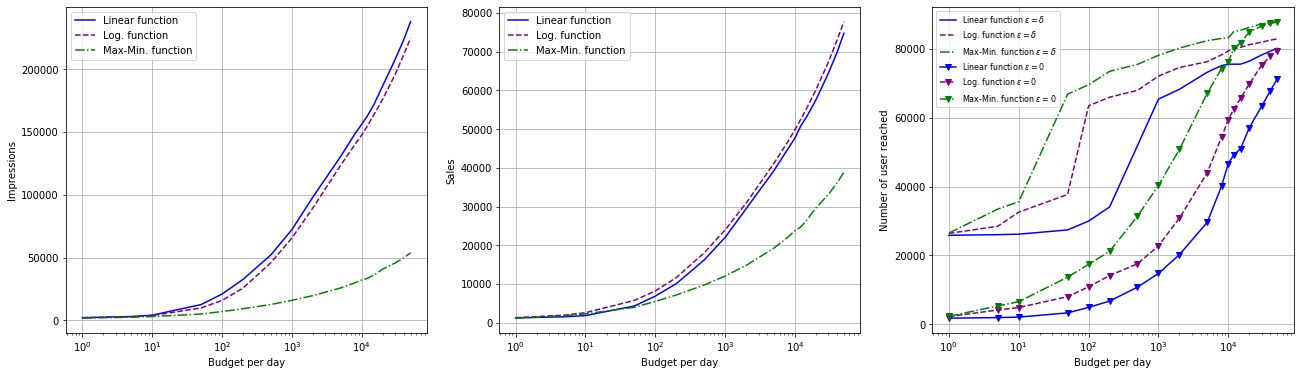

In [34]:
fig, axes = plt.subplots(1,3,figsize=(22,6))

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

Data_Linear.plot('Budget','Impressions', color='blue',label = "Linear function",ax=ax1)
Data_Log.plot('Budget','Impressions',color='purple',label = "Log. function",linestyle='dashed',ax=ax1)
Data_M.plot('Budget','Impressions',color='green',label = "Max-Min. function",linestyle='dashdot',ax=ax1)
ax1.set_xlabel('Budget per day') 
ax1.set_ylabel('Impressions') 
ax1.grid(True)
ax1.legend( loc="upper left" ) 

Data_Linear.plot('Budget','Logarithmic utility function', color='blue',label = "Linear function",ax=ax2)
Data_Log.plot('Budget','Logarithmic utility function',color='purple',label = "Log. function",linestyle='dashed',ax=ax2)
Data_M.plot('Budget','Logarithmic utility function',color='green',label = "Max-Min. function",linestyle='dashdot',ax=ax2)
ax2.set_ylabel('Sales') 
ax2.set_xlabel('Budget per day') 
ax2.grid(True)

Data_Linear.plot('Budget','Reach of campaing $\epsilon=\delta$', color='blue',label = "Linear function $\epsilon=\delta$",ax=ax3)
Data_Log.plot('Budget','Reach of campaing $\epsilon=\delta$',color='purple',label = "Log. function $\epsilon=\delta$",linestyle='dashed',ax=ax3)
Data_M.plot('Budget','Reach of campaing $\epsilon=\delta$',color='green',label = "Max-Min. function $\epsilon=\delta$",linestyle='dashdot',ax=ax3)

Data_Linear.plot('Budget','Reach of campaing $\epsilon=0$', color='blue',marker='v',label = "Linear function $\epsilon=0$",ax=ax3)
Data_Log.plot('Budget','Reach of campaing $\epsilon=0$',color='purple',label = "Log. function $\epsilon=0$",marker='v',linestyle='dashed',ax=ax3)
Data_M.plot('Budget','Reach of campaing $\epsilon=0$',color='green',label = "Max-Min. function $\epsilon=0$",marker='v',linestyle='dashdot',ax=ax3)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

ax3.set_ylabel('Number of user reached') 
ax3.set_xlabel('Budget per day') 
ax3.grid(True)
ax3.legend( loc="upper left" ,prop={'size': 8}) 
ax3.grid(True)

plt.savefig('Metrics across different campaign policies.png',dpi=300)

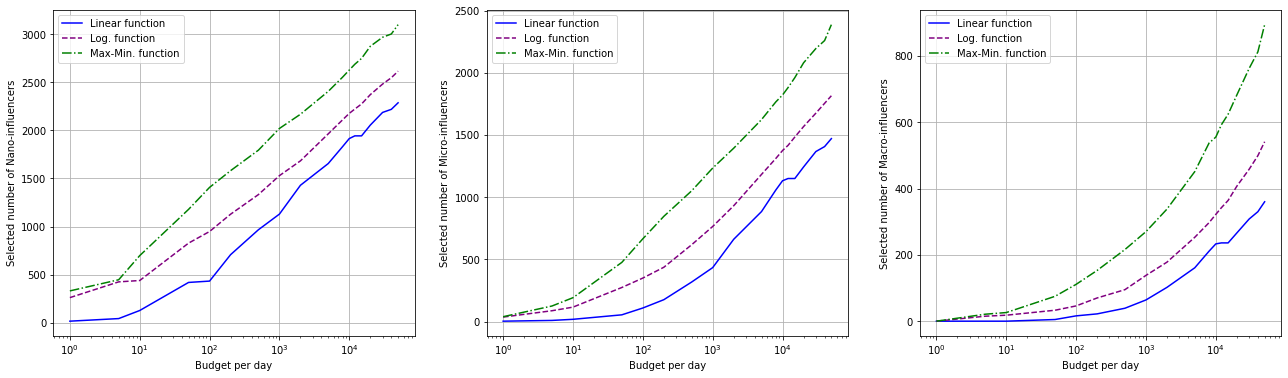

In [35]:
fig, axes = plt.subplots(1,3,figsize=(22,6))

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

Data_Linear.plot('Budget','Number of Nano-influencers', color='blue',label = "Linear function",ax=ax1)
Data_Log.plot('Budget','Number of Nano-influencers',color='purple',label = "Log. function",linestyle='dashed',ax=ax1)
Data_M.plot('Budget','Number of Nano-influencers',color='green',label = "Max-Min. function",linestyle='dashdot',ax=ax1)

ax1.set_ylabel('Selected number of Nano-influencers') 
ax1.set_xlabel('Budget per day') 
ax1.grid(True)
ax1.legend( loc="upper left" ) 

Data_Linear.plot('Budget','Number of Micro-influencers', color='blue',label = "Linear function",ax=ax2)
Data_Log.plot('Budget','Number of Micro-influencers',color='purple',label = "Log. function",linestyle='dashed',ax=ax2)
Data_M.plot('Budget','Number of Micro-influencers',color='green',label = "Max-Min. function",linestyle='dashdot',ax=ax2)
ax2.set_ylabel('Selected number of Micro-influencers') 
ax2.set_xlabel('Budget per day') 
ax2.legend( loc="upper left" ) 
ax2.grid(True)

Data_Linear.plot('Budget','Number of Macro-influencers', color='blue',label = "Linear function",ax=ax3)
Data_Log.plot('Budget','Number of Macro-influencers',color='purple',label = "Log. function",linestyle='dashed',ax=ax3)
Data_M.plot('Budget','Number of Macro-influencers',color='green',label = "Max-Min. function",linestyle='dashdot',ax=ax3)
ax3.set_ylabel('Selected number of Macro-influencers') 
ax3.set_xlabel('Budget per day') 
ax3.grid(True)
ax3.legend( loc="upper left" ) 

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

plt.savefig('Influencers across different campaign policies.png',dpi=300)

The six plots illustrates how the above metrics change with increasing monetary budget per day, for each of the three different campaign objectives (Linear, Logarithmic and Max-min). Note here that Algorithm $2$ has sub-linear convergence as empirically observed. 

Text(0.5, 1.0, 'Percentage of profit growth at each step')

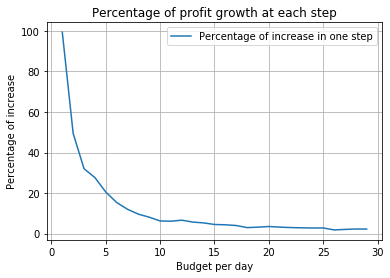

In [36]:
Conv=pd.read_csv('/Users/Ricardo Lopez Dawn/Desktop/BPO/Sub-linear convergence.txt', sep="\t", header=None, names=['Number of iteration','Percentage of increase in one step'])
Conv=Conv.astype(float)
ax=Conv.plot('Number of iteration','Percentage of increase in one step')
ax.grid(True)
ax.set_ylabel('Percentage of increase') 
ax.set_xlabel('Budget per day') 
ax.set_title('Percentage of profit growth at each step')

More precisely, we observe the following:

- ***Linear objective*** - This campaign gives the most impressions performance because this metric coincides with the objective. It gives very high sales for large budgets (more than $50$ [EUR/day]), but has the worst reach performance everywhere independent of $\epsilon$. Interestingly, it selects the least number of influencers in all categories, for any budget given. 


- ***Logarithmic objective*** - This campaign gives the best sales performance because this metric coincides with the campaign. Also, very high impressions and a moderate reach performance. It selects more influencers than the linear, in all categories.


- ***Max-min objective*** - This campaign gives the best audience reach for any given budget and $\epsilon$ chosen, but performs bad in Sales and impressions. In fact, for a budget $>40K$ [EUR/day] the campaign can reach all possible users for both $\epsilon$ values.

For all three objectives, the optimal policy selects mostly Nano- and Micro-influencers in low budgets. Macro-influencers are selected for larger budgets. In fact, the number of Nano- and Micro-influencers selected increases logarithmically with increasing *Budget*, whereas the number of Macro-influencers linearly with the *Budget*.

Hence, regardless of the campaign policy, our models capture reasonably well the reality by selecting the nature of the influencers, where nano-influencers are privileged more than micro-influencers and in turn these are privileged much more than macro-influencers. These observations coincide with the reality because the impressions and engagement campaigns are being discontinued as time progresses and advertising campaigns today have focused primarily on reach and sales metrics through different utility functions. 

## Reference

[1]. MacKinnon, K.A.. User Generated Content vs. Advertising: Do Consumers Trust the Word of Others Over Advertisers?.  *The Elon Journal of Undergraduate Research in Communications*, Vol. 3, No. 1, 2012.

[2]. Ltd, A., 2021. *The influencers with engagement rates 24x higher than PUMA, and how PUMA found them.* https://resources.audiense.com/case-studies/puma-found-social-media-twitter-micro-influencers-engagement-rates-sports-runners-24x-higher/ [Accessed 18 May 2021].

[3]. Spotify. 2021. *#thatsongwhen - Spotify.* https://spotifycampaign.wordpress.com/tag/thatsongwhen/ [Accessed 18 May 2021].

[4]. Influencer Marketing Hub. 2021. *The State of Influencer Marketing 2020: Benchmark Report.* https://influencermarketinghub.com/influencer-marketing-benchmark-report-2020/ [Accessed 18 May 2021].

[5]. Kempe, D., Kleinberg, J., & Tardos, É. Maximizing the spread of influence through a social network. In *Proceedings of the ninth ACM SIGKDD international conference on Knowledge discovery and data mining*, pp. 137-146, August, 2003.

[6]. Lakhotia, K., & Kempe, D. Approximation algorithms for coordinating Ad campaigns on social networks. In *Proceedings of the 28th ACM International Conference on Information and Knowledge Management*, pp. 339-348, November, 2019.

[7]. Nguyen, H., & Zheng, R. On budgeted influence maximization in social networks. IEEE *Journal on Selected Areas in Communications, 31*(6), 1084-1094, 2013.

[8]. Giovanidis, A., Baynat, B., & Vendeville, A. Performance analysis of online social platforms. In *IEEE INFOCOM 2019-IEEE Conference on Computer Communications*, pp. 2413-2421, April 2019.

[9]. R. Srikant. *The Mathematics of Internet Congestion Control*. Springer Science & Business Media, 2004.

[10]. Shakkottai, S., Shakkottai, S. G., & Srikant, R. *Network optimization and control.* Now Publishers Inc., 2008

[11]. Narici, L., & Beckenstein, E. *Topological vector spaces.* CRC Press, 2010.

[12]. Kaggle.com. 2021. *Russian election 2018 - twitter user activity.* https://www.kaggle.com/borisch/russian-election-2018-twitter [Accessed 18 May 2021].
